# Problem 1a - MBSAS Implementation

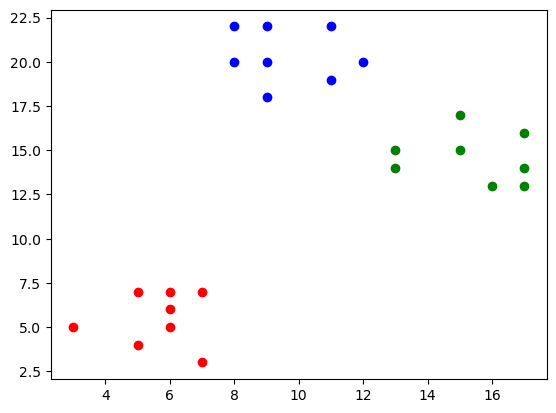

In [10]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import random

# Problem 1a

def MBSAS(data, threshold, max_clusters):
    
    '''
    Implements the MBSAS algorithm, which divides the clustering into two passes. In the first pass, points
    that exceed a specific threshold are created as distinct clusters. In the second pass, points are 
    assigned to the clusters created in the first pass.
    
    Inputs:
    data - a list of vectors
    thershold - the threshold that is used to determine whether a new cluster should be formed or not
    max_clusters - the amount of clusters that should be formed
    
    Outputs:
    Clusters - a list of lists of vectors that corresponds to the clusters formed by the algorithm
    '''
    
    
    Clusters = []
    
    m = 1
    C_start = [data[0]]
    Clusters.append(C_start)

    #first pass
    for i in range(1, len(data)):
        xi = data[i]
        distance, Ck = best_cluster(xi, Clusters)

        if distance > threshold and m < max_clusters:
            m += 1
            C = [data[i]]
            Clusters.append(C)

    #second pass
    for i in range(len(data)):
        xi = data[i]
        if not already_in_cluster(xi, Clusters):
            distance, Ck = best_cluster(xi, Clusters)
            Ck.append(xi)

    return Clusters

# min proximity function between vector and set: d(x,C) = min [d(x,y) for all y in C]
def best_cluster(vector, clusters):
    '''
    Determines the cluster that is closest to a given vector. In the worst case this can lead to N comparisons
    resulting in an overall complexity of O(N^2).
    
    Inputs:
    vector - the vector that should be compared
    clusters - the list of clusters that the vector should be compared to
    
    Outputs:
    best_cluster - the cluster that the vector is closest to
    min_distance - the distance between the vector and the best_cluster
    '''
    
    best_cluster = None

    min_distance = float('inf')

    # iterate over all clusters
    for cluster in clusters:
        
        for vec in cluster:
            
            #determine distance to current vector
            distance = euclidean_distance(vector, vec)

            #if this distance is less than the current best distance, then reassign best_cluster to the 
            #cluster we are currently in and min_distance to the distance we just calculated
            if distance < min_distance:
                best_cluster = cluster
                min_distance = distance
            else:
                continue
    
    return min_distance, best_cluster

def euclidean_distance(vector1, vector2):
    '''
    Determines the euclidean distance between vector1 and vector2
    '''
    
    distance = 0

    for feature1, feature2 in zip(vector1, vector2):
        distance += (feature1 - feature2)**2

    return sqrt(distance)

def already_in_cluster(vector, clusters):
    '''
    Determines whether the inputted vector is already any of the inputted clusters
    '''
    
    for cluster in clusters:
        if vector in cluster:
            return True

    return False


# This uses a dataset generated by ChatGPT to debug and run the algorithm

data = [(6, 5), (6, 6), (5, 4), (7, 7), (3, 5), (5, 7), (7, 7), (5, 4), (6, 7), (7, 3), (17, 16), (13, 15), (17, 14), (16, 13), (13, 14), (17, 13), (15, 15), (17, 13), (17, 13), (15, 17), (9, 18), (8, 20), (8, 22), (11, 19), (9, 18), (12, 20), (11, 19), (9, 22), (11, 22), (9, 20)]


threshold = 8.5
max_clusters = 4
Clusters = MBSAS(data, threshold, max_clusters)


# colors was also generated by Chatgpt
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'w', 'orange', 'purple', 'pink', 'brown', 'teal', 'navy', 'lime']

for i, cluster in enumerate(Clusters):
    x, y = zip(*cluster)
    plt.scatter(x, y, c=colors[i])
plt.show()

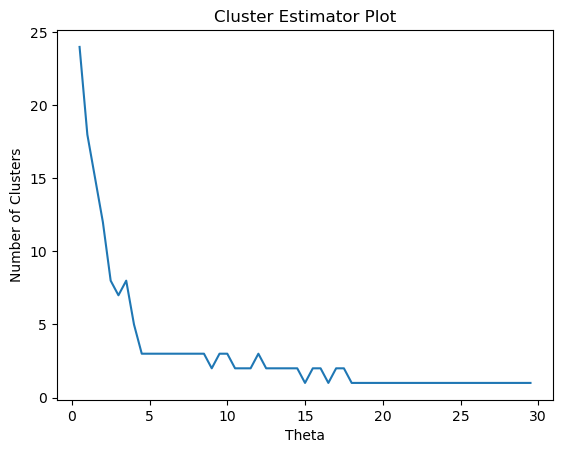

In [2]:
#Checking whether the Cluster Estimation Plot aligns with the expected shape of the plot from the slides

data = [(6, 5), (6, 6), (5, 4), (7, 7), (3, 5), (5, 7), (7, 7), (5, 4), (6, 7), (7, 3), (17, 16), (13, 15), (17, 14), (16, 13), (13, 14), (17, 13), (15, 15), (17, 13), (17, 13), (15, 17), (9, 18), (8, 20), (8, 22), (11, 19), (9, 18), (12, 20), (11, 19), (9, 22), (11, 22), (9, 20)]


num_of_clusters = []

for theta in np.arange(0.5, 30, 0.5):
    random.shuffle(data)
    Clusters = MBSAS(data, theta, 40)
    num_of_clusters.append(len(Clusters))

plt.plot(np.arange(0.5, 30, 0.5), num_of_clusters)
plt.title('Cluster Estimator Plot')
plt.xlabel('Theta')
plt.ylabel('Number of Clusters')
plt.show()

In [3]:
#importing the data

import pandas as pd

file = '/Users/daviddechantsreiter/Desktop/WPI/Courses/Intro to AI/HW3/cluster_data.txt'
data = pd.read_csv(file, delim_whitespace=True, header=None, usecols=[1,2])

data.columns = ['Width', 'Length']
data
cluster_data = data[['Width', 'Length']].values.tolist()

# Problem 1b - Cluster Estimation using a range of $\theta$

In [4]:
num_of_clusters = []

def plot_theta_estimator(data, theta_range):
    
    '''
    Plots the Cluster Estimator Plot from the lecture slides
    '''

    for theta in theta_range:
        random.shuffle(data)
        Clusters = MBSAS(data, theta, 70)
        num_of_clusters.append(len(Clusters))

    plt.plot(theta_range, num_of_clusters)
    plt.title('Cluster Estimator Plot')
    plt.xlabel('Theta')
    plt.ylabel('Number of Clusters')
    plt.show()

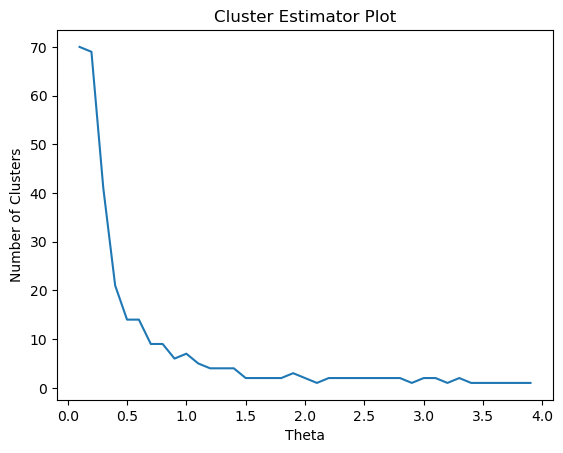

In [5]:
estimator_range = np.arange(0.1, 4, 0.1)
plot_theta_estimator(cluster_data, estimator_range)

# Problem 1c -
## Determining $\theta$ Range
## Plotting Clustering from cluster_data.txt
## Reporting Time

In [6]:
paired_values = list(zip(estimator_range, num_of_clusters))
print(paired_values)

[(0.1, 70), (0.2, 69), (0.30000000000000004, 41), (0.4, 21), (0.5, 14), (0.6, 14), (0.7000000000000001, 9), (0.8, 9), (0.9, 6), (1.0, 7), (1.1, 5), (1.2000000000000002, 4), (1.3000000000000003, 4), (1.4000000000000001, 4), (1.5000000000000002, 2), (1.6, 2), (1.7000000000000002, 2), (1.8000000000000003, 2), (1.9000000000000001, 3), (2.0, 2), (2.1, 1), (2.2, 2), (2.3000000000000003, 2), (2.4000000000000004, 2), (2.5000000000000004, 2), (2.6, 2), (2.7, 2), (2.8000000000000003, 2), (2.9000000000000004, 1), (3.0000000000000004, 2), (3.1, 2), (3.2, 1), (3.3000000000000003, 2), (3.4000000000000004, 1), (3.5000000000000004, 1), (3.6, 1), (3.7, 1), (3.8000000000000003, 1), (3.9000000000000004, 1)]


### Based on the plot and the data we can see that the optimal number of clusters is 2 with the widest flat region ranging from 1.6 to 2.7. To determine the optimal theta we use the rule provided by the assignment:

### $\theta = \frac{{\theta_1} + {\theta_2}}{2}$

### so we get 

### $\frac{1.6 + 2.7}{2} = 2.15$

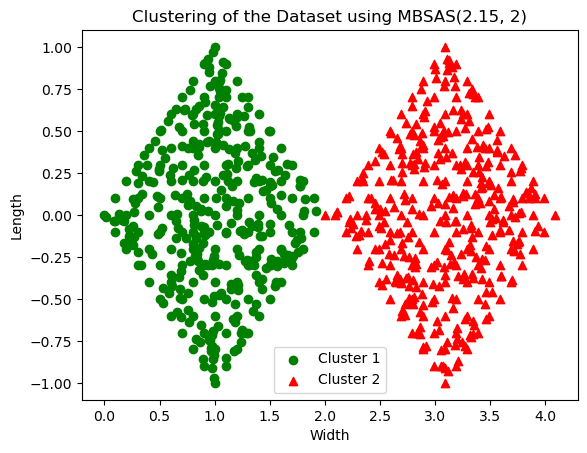

In [7]:
random.shuffle(cluster_data)

Clusters = MBSAS(cluster_data, 2.15, 2)

colors = ['g', 'r']
markers = ['o', '^']

for i, cluster in enumerate(Clusters):
    x, y = zip(*cluster)
    plt.scatter(x, y, c=colors[i], marker=markers[i], label=f'Cluster {i+1}')

plt.title('Clustering of the Dataset using MBSAS(2.15, 2)')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

In [8]:
import time 

In [9]:
# measuring time for the algorithm to run
start_time = time.time()

Clusters = MBSAS(cluster_data, 2.15, 2)

end_time = time.time()
print(f"Time taken: {end_time - start_time:.5f} seconds")

Time taken: 0.26458 seconds
